In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [7]:
train_df = pd.read_csv('./csiro-biomass/train.csv')
print(train_df.shape)
display(train_df)

(1785, 9)


sample_id              image_path Sampling_Date State  \
0     ID1011485656__Dry_Clover_g  train/ID1011485656.jpg      2015/9/4   Tas   
1       ID1011485656__Dry_Dead_g  train/ID1011485656.jpg      2015/9/4   Tas   
2      ID1011485656__Dry_Green_g  train/ID1011485656.jpg      2015/9/4   Tas   
3      ID1011485656__Dry_Total_g  train/ID1011485656.jpg      2015/9/4   Tas   
4            ID1011485656__GDM_g  train/ID1011485656.jpg      2015/9/4   Tas   
...                          ...                     ...           ...   ...   
1780   ID983582017__Dry_Clover_g   train/ID983582017.jpg      2015/9/1    WA   
1781     ID983582017__Dry_Dead_g   train/ID983582017.jpg      2015/9/1    WA   
1782    ID983582017__Dry_Green_g   train/ID983582017.jpg      2015/9/1    WA   
1783    ID983582017__Dry_Total_g   train/ID983582017.jpg      2015/9/1    WA   
1784          ID983582017__GDM_g   train/ID983582017.jpg      2015/9/1    WA   

              Species  Pre_GSHH_NDVI  Height_Ave_cm   target_name   target  
0     Ryegrass_Clover           0.62         4.6667  Dry_Clover_g   0.0000  
1     Ryegrass_Clover           0.62         4.6667    Dry_Dead_g  31.9984  
2     Ryegrass_Clover           0.62         4.6667   Dry_Green_g  16.2751  
3     Ryegrass_Clover           0.62         4.6667   Dry_Total_g  48.2735  
4     Ryegrass_Clover           0.62         4.6667         GDM_g  16.2750  
...               ...            ...            ...           ...      ...  
1780         Ryegrass           0.64         9.0000  Dry_Clover_g   0.0000  
1781         Ryegrass           0.64         9.0000    Dry_Dead_g   0.0000  
1782         Ryegrass           0.64         9.0000   Dry_Green_g  40.9400  
1783         Ryegrass           0.64         9.0000   Dry_Total_g  40.9400  
1784         Ryegrass           0.64         9.0000         GDM_g  40.9400  

[1785 rows x 9 columns]

In [8]:
TARGET_COLS = [c for c in train_df.columns if c not in ['image_id', 'Image']]
print(f"Target columns: {TARGET_COLS}")
print(f"Number of targets: {len(TARGET_COLS)}")

Target columns: ['sample_id', 'image_path', 'Sampling_Date', 'State', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target_name', 'target']
Number of targets: 9


In [18]:
[col for col in TARGET_COLS if col not in ['sample_id', 'image_path', 'State', 'target_name']]

['Sampling_Date', 'Species', 'Pre_GSHH_NDVI', 'Height_Ave_cm', 'target']

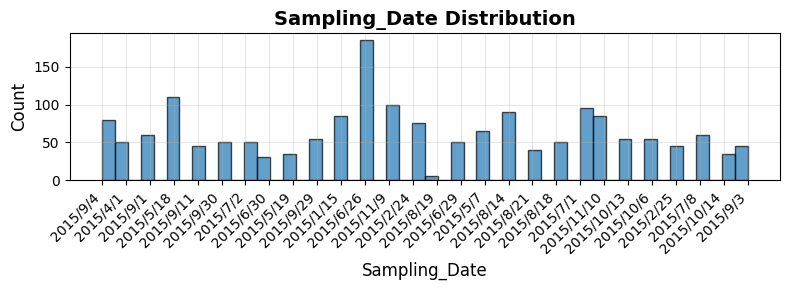

C:\Users\USER\AppData\Local\Temp\ipykernel_11704\4025967334.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Adjust layout to prevent overlap


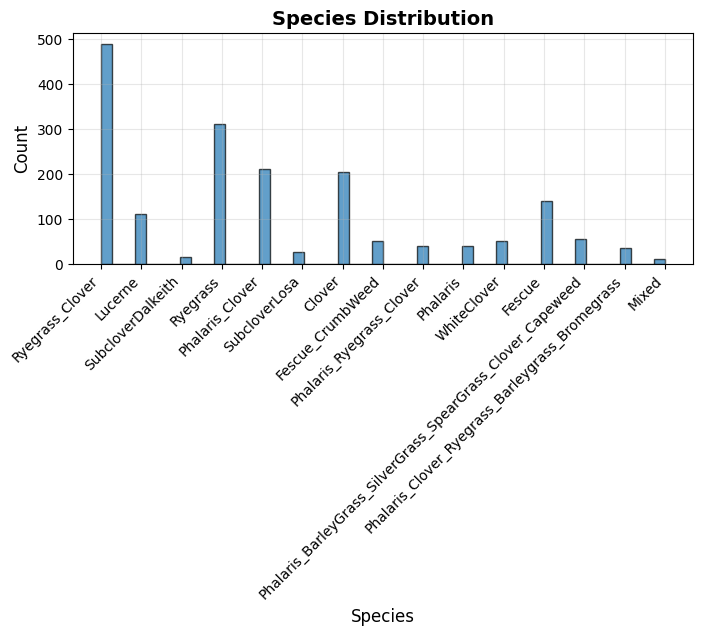

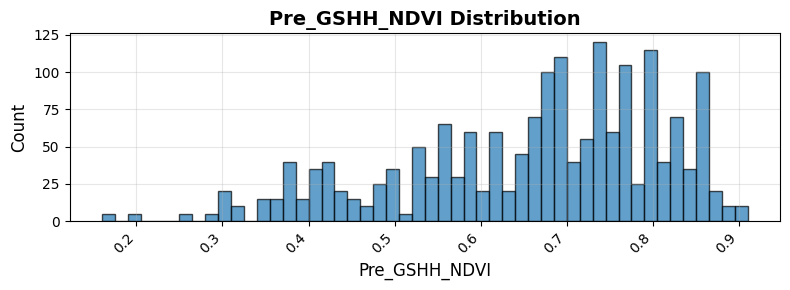

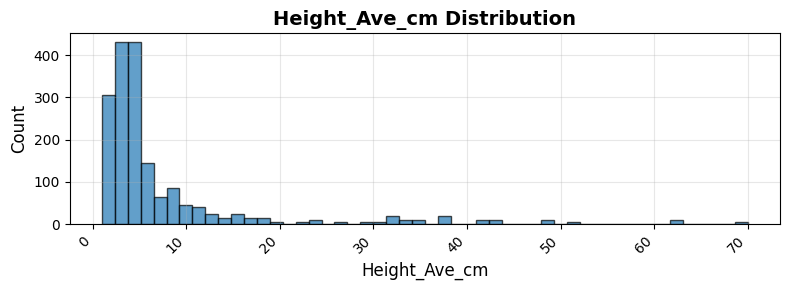

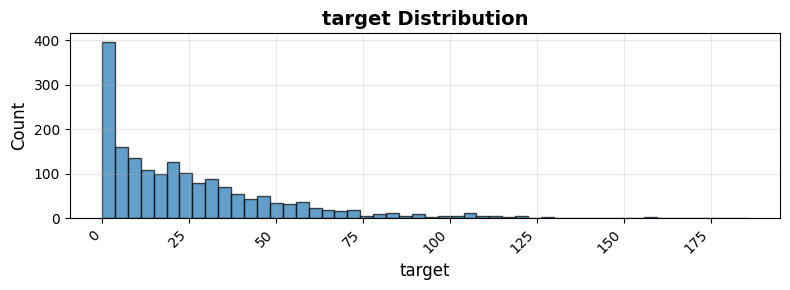

In [ ]:
cols_to_plot = [col for col in TARGET_COLS if col not in ['sample_id', 'image_path', 'State', 'target_name']]

for col in cols_to_plot:
    plt.figure(figsize=(8, 3))
    plt.hist(train_df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'{col} Distribution', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout() 
    plt.show()

In [10]:
print("\nMissing values per column:")
print(train_df.isnull().sum())


Missing values per column:
sample_id        0
image_path       0
Sampling_Date    0
State            0
Species          0
Pre_GSHH_NDVI    0
Height_Ave_cm    0
target_name      0
target           0
dtype: int64


In [19]:
train_df['target_name'].value_counts()

target_name
Dry_Clover_g    357
Dry_Dead_g      357
Dry_Green_g     357
Dry_Total_g     357
GDM_g           357
Name: count, dtype: int64

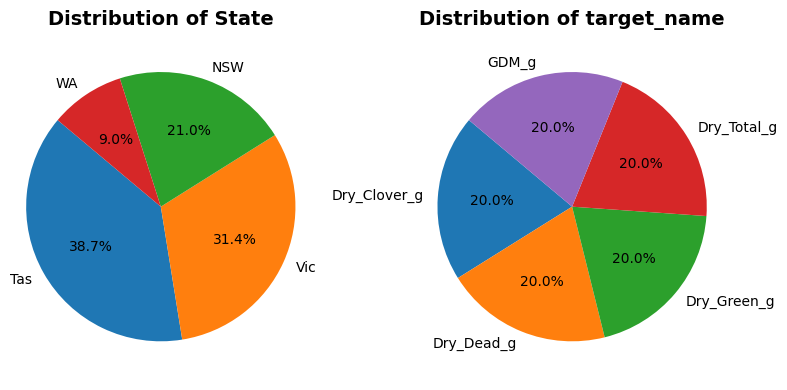

In [14]:
cols_to_plot = ['State', 'target_name']
n_rows, n_cols = 1, len(cols_to_plot)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

# Ensure axes is an array even for a single subplot
axes = axes.flatten()

for ax, col in zip(axes, cols_to_plot):
    counts = train_df[col].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

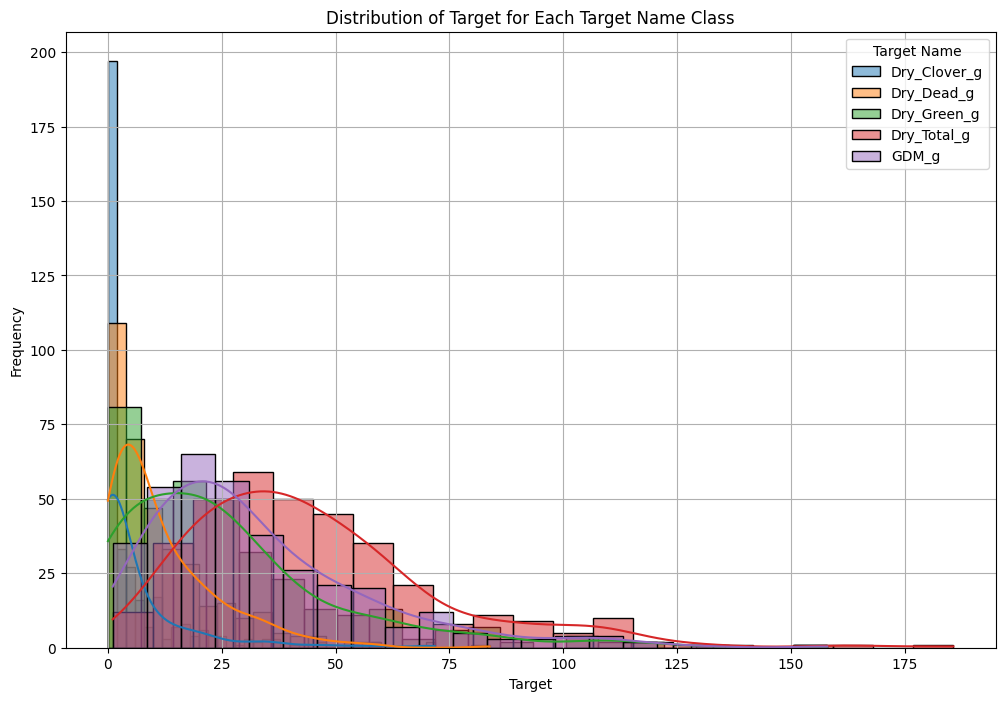

In [15]:
grouped_train_data = train_df.groupby('target_name')

plt.figure(figsize=(12, 8))
for target_name, group_data in grouped_train_data:
    sns.histplot(data=group_data, x='target', kde=True, label=target_name)

plt.title('Distribution of Target for Each Target Name Class')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.legend(title='Target Name')
plt.grid(True) # Added grid here
plt.show()

In [26]:
train_df.sort_values(by='target')

sample_id              image_path Sampling_Date State  \
0     ID1011485656__Dry_Clover_g  train/ID1011485656.jpg      2015/9/4   Tas   
1565   ID753699705__Dry_Clover_g   train/ID753699705.jpg     2015/2/24   NSW   
225    ID121331988__Dry_Clover_g   train/ID121331988.jpg      2015/5/7   NSW   
610   ID1618145129__Dry_Clover_g  train/ID1618145129.jpg    2015/11/10   Tas   
1155   ID354528442__Dry_Clover_g   train/ID354528442.jpg     2015/2/24   NSW   
...                          ...                     ...           ...   ...   
148    ID1139866256__Dry_Total_g  train/ID1139866256.jpg      2015/5/7   NSW   
1182    ID384648061__Dry_Green_g   train/ID384648061.jpg     2015/10/6   NSW   
1184          ID384648061__GDM_g   train/ID384648061.jpg     2015/10/6   NSW   
1548    ID746335827__Dry_Total_g   train/ID746335827.jpg     2015/10/6   NSW   
1183    ID384648061__Dry_Total_g   train/ID384648061.jpg     2015/10/6   NSW   

              Species  Pre_GSHH_NDVI  Height_Ave_cm   target_name    target  
0     Ryegrass_Clover           0.62         4.6667  Dry_Clover_g    0.0000  
1565         Ryegrass           0.74        13.0000  Dry_Clover_g    0.0000  
225            Fescue           0.75         8.0000  Dry_Clover_g    0.0000  
610   Ryegrass_Clover           0.84         4.1667  Dry_Clover_g    0.0000  
1155         Ryegrass           0.68        10.0000  Dry_Clover_g    0.0000  
...               ...            ...            ...           ...       ...  
148            Fescue           0.66        13.0000   Dry_Total_g  157.9000  
1182           Fescue           0.85        14.6667   Dry_Green_g  157.9836  
1184           Fescue           0.85        14.6667         GDM_g  157.9836  
1548           Fescue           0.75        24.3333   Dry_Total_g  166.1000  
1183           Fescue           0.85        14.6667   Dry_Total_g  185.7000  

[1785 rows x 9 columns]

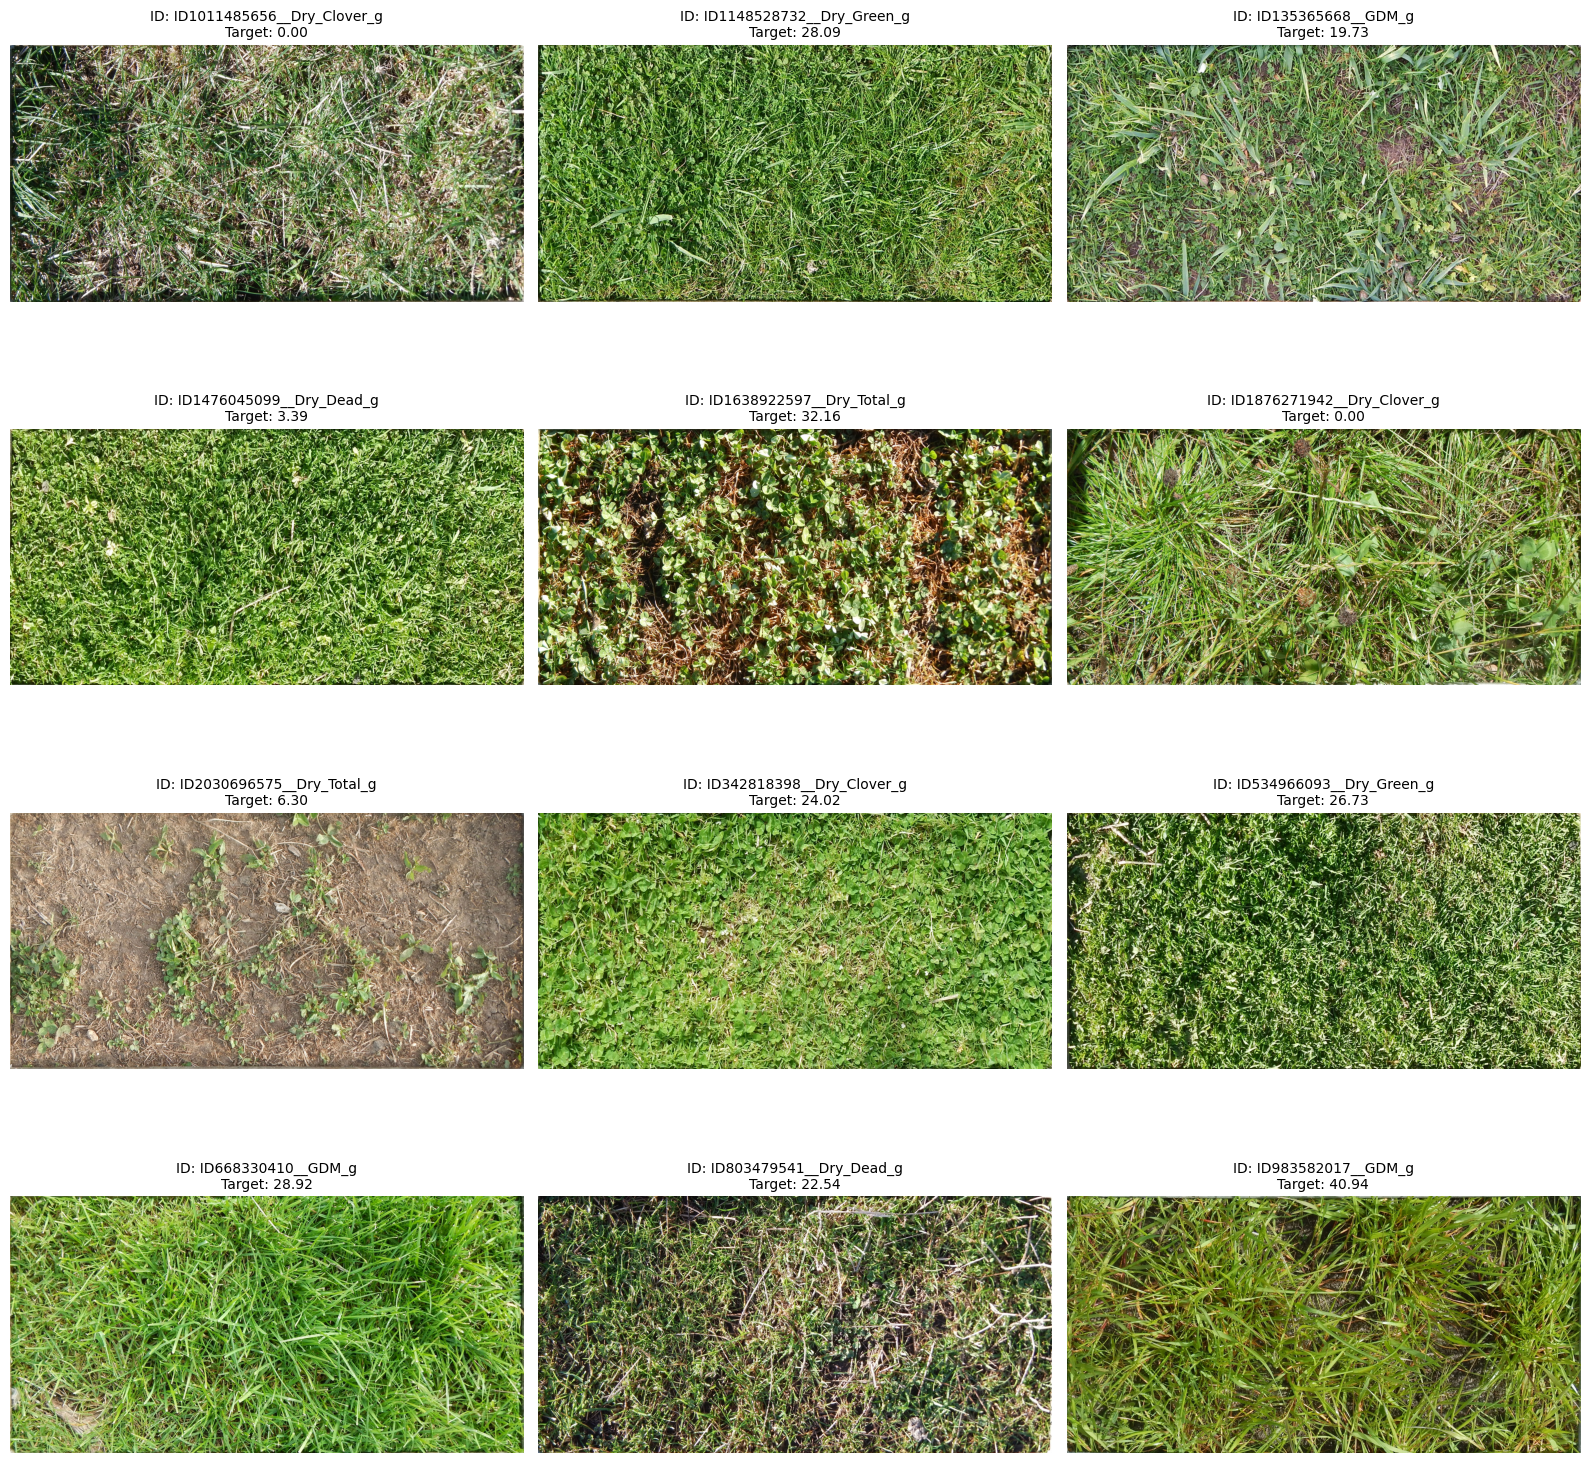

In [27]:
def show_images(df_sample, n=12, path_img='./csiro-biomass/'):

    # Sort the DataFrame by the 'target' column
    df_sorted = df_sample#.sort_values(by='target').reset_index(drop=True)

    # Perform linear sampling
    indices_to_show = np.linspace(0, len(df_sorted) - 1, n, dtype=int)
    df_to_show = df_sorted.iloc[indices_to_show]

    # Determine the number of rows and columns for subplots
    n_cols = 3  # You can adjust this number
    n_rows = (n + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    # Remove unused subplots if any
    for i in range(n, len(axes)):
        fig.delaxes(axes[i])

    for i, (idx, row) in enumerate(df_to_show.iterrows()):
        # Use image_path directly (includes train/ID....jpg)
        img_path = os.path.join(path_img, row['image_path'])

        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB')
            axes[i].imshow(img)
            # Include the target value in the title
            title = f"ID: {row['sample_id']}\nTarget: {row['target']:.2f}"
            axes[i].set_title(title, fontsize=10)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage: Show 12 images linearly sampled based on target value
show_images(train_df, n=12)